<h1> Analysis of Datasets </h1>
<h2> Using Logistic Regression and Naive Bayes </h2>

<h2>Dataset 4: Blood Transfusion Service Center</h2>

Dataset obtained from: https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

Approach:  We first prepare the dataset to train both the models. We then train the model and compare the performance of both the algorithms. 

<h2> Section 1: Preparing the Data </h2>
<h3> Loading the dataset </h3>

In [101]:
#loading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path = 'Datasets/transfusion.data'
rawFileData = pd.read_csv(path)

<h3> Data Overview </h3>
Lets overview our dataset by displaying the top ten records

In [72]:
rawFileData.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


<h3>Cleaning the data by removing rows with missing values</h3>

According to the source website, there are no missing values in this dataset.

<h3> Converting all data values to float </h3>

In [73]:
headerData = ["Recency (months)","Frequency (times)","Monetary (c.c. blood)","Time (months)","whether he/she donated blood in March 2007"]
for cols in headerData:
    rawFileData[cols] = rawFileData[cols].astype(float)

<h3> Displaying basic statisics about the data </h3>

In [74]:
rawFileData.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


<h3> Extracting the labels </h3>


In [75]:
#get label column from dataframe
Y = rawFileData['whether he/she donated blood in March 2007']
#converting to numpy array
Y_labels = Y.to_numpy()
#removing labels col from rest of dataframe
rawFileData.drop(['whether he/she donated blood in March 2007'],axis=1, inplace=True)

<h3> Extracting the data </h3>

In [76]:
X_data = rawFileData.to_numpy()

<h2> Section 2: Implementing the Models </h2>

The models have been implemented in a separate file. 
We import these modules to work with them.

In [77]:
#importing the implementation for the algorithms
import L_Regression
import N_Bayes


#making a class instance
logistic = L_Regression.LogisticRegression()
naive = N_Bayes.NaiveBayes()

<h2> Section 3: Running Experiments </h2>

We run the experiments stated in the project requirements.

<h2> EXPERIMENT 1: Compare the accuracy of naive Bayes and logistic regression </h2>

<h3> Fitting the models </h3>


In [83]:
AccuracyTrace = logistic.fit(X_data,Y_labels)
naive.fit(X_data, Y_labels)

<h3> Accuracy of Logistic Regression </h3>

In [79]:
logistic.evaluate_acc(Y_labels, logistic.predict(X_data))

0.7620320855614974

Hence, our Logistic Regression model has an accuracy of 76.20% on this dataset.

<h3> Accuracy of Naive Bayes </h3>

In [ ]:
naive.evaluate_acc(Y_labels, naive.predict(X_data))

Hence, our Naive Bayes model has an accuracy of 75.00% on this dataset.

Experiment 1 concludes that Logistic Regression is more accurate than Naive Bayes for this dataset.

<h2> EXPERIMENT 2: Test different learning rates for gradient descent applied to logistic regression </h2>


<h4> 1. Learning Rate vs Accuracy </h4>

In [ ]:
learning_rates = [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10]

In [ ]:
accuracy = []
for rates in learning_rates:
    accuracy.append(logistic.fit(X_data, Y_labels, rates).pop())
table1 = pd.DataFrame({'Learning Rate' : learning_rates, 'Final Accuracy' : accuracy})

In [81]:
table1


,Learning Rate,Final Accuracy
0,0.00001,0.739305
1,0.00010,0.775401
2,0.00100,0.755348
3,0.01000,0.762032
4,0.10000,0.250000
5,1.00000,0.237968
6,10.00000,0.237968


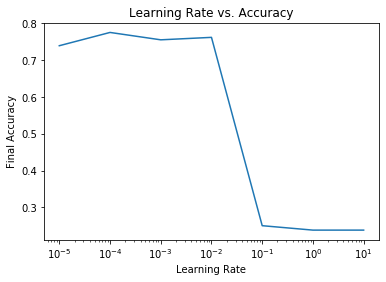

In [82]:
plt.xlabel('Learning Rate') 
plt.ylabel('Final Accuracy') 
plt.title('Learning Rate vs. Accuracy') 
plt.plot(learning_rates, accuracy)
plt.xscale("log")
plt.show()

<h4> 2. Number of Iterations vs Accuracy </h4>

In [84]:
count=0
Iteration = []
for i in AccuracyTrace:
    count = count + 1
    Iteration.append(count)

In [85]:
table2 = pd.DataFrame({'Iteration' : Iteration, 'Accuracy' : AccuracyTrace})

In [86]:
table2

,Iteration,Accuracy
0,1,0.762032
1,2,0.237968
2,3,0.247326
3,4,0.240642
4,5,0.762032
...,...,...
495,496,0.589572
496,497,0.413102
497,498,0.469251
498,499,0.771390


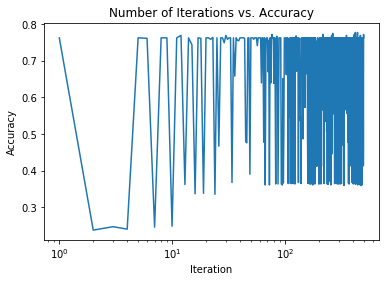

In [88]:
plt.xlabel('Iteration') 
plt.ylabel('Accuracy') 
plt.title('Number of Iterations vs. Accuracy') 
plt.plot(Iteration, AccuracyTrace)
plt.show()

<h2> EXPERIMENT 3: Compare the accuracy of the two models as a function of the size of dataset </h2>


<h3> 1. Logistic Regression </h3>

In [91]:
percentageTrainingSize = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dataSize = []
percentages = []
for per in percentageTrainingSize:
    dataSize.append(per*X_data.shape[0])
    percentages.append(str(per*100)+"%")


In [92]:
dataSize = [int(i) for i in dataSize]

In [93]:
Acc = []
for size in dataSize:
    Acc.append(logistic.fit(X_data[1:size], Y_labels[1:size]).pop())

In [94]:
table3 = pd.DataFrame({'Dataset Size (%)' : percentages, 'Accuracy' : Acc})

In [95]:
table3

,Dataset Size (%),Accuracy
0,20.0%,0.479730
1,30.0%,0.367713
2,40.0%,0.671141
3,50.0%,0.705094
4,60.0%,0.744966
5,70.0%,0.651341
6,80.0%,0.358459
7,90.0%,0.735119
8,100%,0.768407


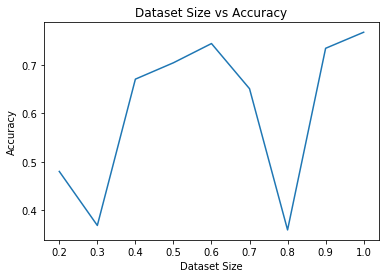

In [96]:
plt.xlabel('Dataset Size') 
plt.ylabel('Accuracy') 
plt.title('Dataset Size vs Accuracy') 
plt.plot(percentageTrainingSize, Acc)
plt.show()

<h3> 2. Naive Bayes </h3>

In [97]:
Acc2 = []
for size in dataSize:
    Acc2.append(naive.evaluate_acc(Y_labels[1:size], naive.predict(X_data[1:size])))

In [98]:
table4 = pd.DataFrame({'Dataset Size (%)' : percentages, 'Accuracy' : Acc2})

In [99]:
table4

,Dataset Size (%),Accuracy
0,20.0%,0.520270
1,30.0%,0.600897
2,40.0%,0.640940
3,50.0%,0.672922
4,60.0%,0.718121
5,70.0%,0.735632
6,80.0%,0.716918
7,90.0%,0.730655
8,100%,0.749665


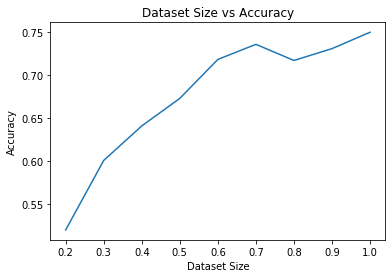

In [100]:
plt.xlabel('Dataset Size') 
plt.ylabel('Accuracy') 
plt.title('Dataset Size vs Accuracy') 
plt.plot(percentageTrainingSize, Acc2)
plt.show()